### Oppgave 5: ### 


#### Mappeoppgave Python 1:
#### a) Skrap data fra nettet, kjør en regresjon, lag et plott og tolk resultatet.

I want to investigate the relationship between the prices of different types of oil in the period 1976 - 2017. I look at the relationship between the prices of Brent oil (North Sea oil) and Dubai oil (Middle East)
Data are downloaded from https://en.wikipedia.org/wiki/Oilprisen which has the BP Statistical Review of World Energy as its source.

I use the recipe for web scraping that we have received at the lectures in sok-1005 in spring 2022:

In [30]:
from bs4 import BeautifulSoup
import requests

def scrape(url, file_name):
    table=[]
    tables=fetch_html_tables(url)
    #iterate over all tables, if there are more than one:
    for tbl in tables:
        #exends table so that table is a list containing elements 
        #from all tables:
        table.extend(html_to_table(tbl))
    #saving it:
    save_data(file_name,table)
    return table
 

def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()


def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    s=s.replace(',','.')
    s=s.replace('-','NaN')
    return s

In [31]:
import numpy as np

I get the table I want

In [32]:
import pandas as pd
url='https://no.wikipedia.org/wiki/Oljeprisen#Historie'
file_name='oljepris.csv'

table=scrape(url,file_name)

s='\n'.join(['\t'.join(row) for row in table])


#printing top
#print(str(s)[:1000])

oljepris = pd.DataFrame(table)
#print(oljepris)

In [34]:
# collect the file
import pandas as pd
oljepris = pd.read_csv('oljepris.csv', delimiter=';', encoding='latin1')
oljepris.head


<bound method NDFrame.head of                                                   Ã
r   Dubai   Brent  \
0                                                1970    1.21     NaN   
1                                                1971    1.69     NaN   
2                                                1972    1.90     NaN   
3                                                1973    2.83     NaN   
4                                                1974   10.41     NaN   
5                                                1975   10.70     NaN   
6                                                1976   11.63   12.80   
7                                                1977   12.38   13.92   
8                                                1978   13.03   14.02   
9                                                1979   29.75   31.61   
10                                               1980   35.69   36.83   
11                                               1981   34.32   35.93   
12                   

In [35]:
print(oljepris.columns)

Index(['Ãr', 'Dubai', 'Brent', 'NigerianForcados', 'WTI'], dtype='object')


In [36]:
print(oljepris_r1.dtypes,sep='')

Year                  int64
Dubai_price         float64
Brent_price         float64
NigerianForcados    float64
WTI                 float64
dtype: object


I remove all rows that do not have all values and subtitles, and arrange new column headings.  
I also change the data type on Brent_price and year:

In [37]:
oljepris_r1 = oljepris.dropna()
oljepris_r1.columns = ['Year','Dubai_price','Brent_price','NigerianForcados','WTI']


oljepris_r1 = oljepris_r1.astype({'Brent_price': float})
oljepris_r1 = oljepris_r1.astype({'Year': int})

oljepris_r1


,Year,Dubai_price,Brent_price,NigerianForcados,WTI
6,1976,11.63,12.80,12.87,12.23
7,1977,12.38,13.92,14.21,14.22
8,1978,13.03,14.02,13.65,14.55
9,1979,29.75,31.61,29.25,25.08
10,1980,35.69,36.83,36.98,37.96
11,1981,34.32,35.93,36.18,36.08
12,1982,31.80,32.97,33.29,33.65
13,1983,28.78,29.55,29.54,30.30
14,1984,28.06,28.78,28.14,29.39
15,1985,27.53,27.56,27.75,27.98


In [38]:
print(oljepris_r1.dtypes,sep='')

Year                  int64
Dubai_price         float64
Brent_price         float64
NigerianForcados    float64
WTI                 float64
dtype: object


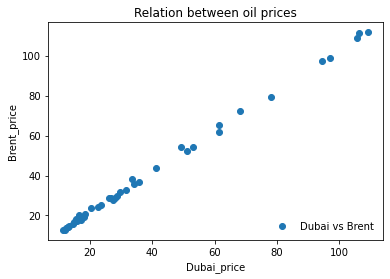

In [39]:
# I make a plot for the connection between Dubai and Brent oil prices: 

from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Brent_price')
ax.set_xlabel('Dubai_price')

#plotting the function:
ax.scatter(oljepris_r1['Dubai_price'], oljepris_r1['Brent_price'], label='Dubai vs Brent')

ax.set_title('Relation between oil prices')
ax.legend(loc='lower right',frameon=False)

Comment:  
The data points show annual data for the ratio between the spot price of Brent_oil and Dubai_oil on average. We see that they are almost in a straight line.

We define y and x:

In [40]:
y=oljepris_r1['Brent_price']
#pd.DataFrame(y)

In [41]:
x=pd.DataFrame(oljepris_r1['Dubai_price'])
x['intercept']=1

and run the regression:

In [42]:
from statsmodels.regression.linear_model import OLS

oil_price_reg=OLS(y,x).fit()

print(oil_price_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Brent_price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.733e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           2.49e-58
Time:                        16:23:25   Log-Likelihood:                -64.518
No. Observations:                  42   AIC:                             133.0
Df Residuals:                      40   BIC:                             136.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Dubai_price     1.0184      0.006    165.307      

In [45]:
# summary of regression parameters:
oil_price_reg.params

Dubai_price    1.018350
intercept      1.264029
dtype: float64

The repression line is defined as $\alpha+\beta \cdot x$ where $\alpha$ gives the point of intersection with the y axis and $\beta$ indicates the slope of the line.   
We see that $\alpha=1.018350$ og $\beta=1.264029$. This gives us the regression line as: $1.018350 + 1.264029 \cdot x$. We also see that the P-value is equal to 0 for both Dubai_price ($\alpha$) and intercept ($\beta$). This means that the result is no coincidence.   
I draw the regression line together with the price plot. 

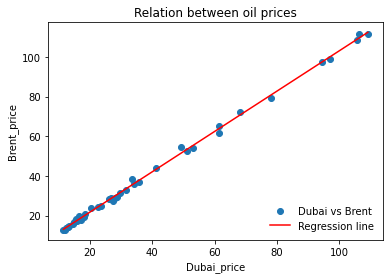

In [44]:
x=np.linspace(min(oljepris_r1['Dubai_price']), max(oljepris_r1['Dubai_price']), 100)

regression_line=oil_price_reg.params['intercept']+oil_price_reg.params['Dubai_price']*x

ax.plot(x, regression_line,color='red',label='Regression line')
ax.legend(loc='lower right',frameon=False)
fig

Comment:  
The regression line is very close to the data. This means that the line expresses the connection between these two oil prices in a good way and that the relationship between the prices is relatively constant regardless of price level.
What does this mean?
The two types of oil are different and may not necessarily be used interchangeably. When the price ratio is so stable over time, it may mean that an agreement has been reached between the major oil producers.